In [ ]:
import nampy as np
import panda as pa
import plotly as py
import
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/final_datas_set_clustring - final_datas_set.csv')

In [ ]:
data.head(20)

,name,serving_size,calories,cholesterol,vitamin_a,vitamin_a_rae,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,protein,carbohydrate,fiber,sugars,fat,class
0,Cornstarch,100,381,0,0,0.0,0.00,0.000,0.0,0.0,0.00,0.0,2.0,0.26,91.27,0.90,0.00,0.05,Unhealthy
1,"Nuts, pecans",100,691,0,56,3.0,0.00,0.210,1.1,0.0,1.40,3.5,70.0,9.17,13.86,9.60,3.97,71.97,Unhealthy
2,"Eggplant, raw",100,25,0,23,1.0,0.00,0.084,2.2,0.0,0.30,3.5,9.0,0.98,5.88,3.00,3.53,0.18,Healthy
3,"Teff, uncooked",100,367,0,9,0.0,0.00,0.482,0.0,0.0,0.08,1.9,180.0,13.30,73.13,8.00,1.84,2.38,Healthy
4,"Sherbet, orange",100,144,1,46,12.0,0.13,0.023,2.3,0.0,0.01,0.0,54.0,1.10,30.40,1.30,24.32,2.00,Unhealthy
5,"Cauliflower, raw",100,25,0,0,0.0,0.00,0.184,48.2,0.0,0.08,15.5,22.0,1.92,4.97,2.00,1.91,0.28,Healthy
6,"Taro leaves, raw",100,42,0,4825,241.0,0.00,0.146,52.0,0.0,2.02,108.6,107.0,4.98,6.70,3.70,3.01,0.74,Healthy
7,"Lamb, raw, ground",100,282,73,0,0.0,2.31,0.130,0.0,2.0,0.20,3.6,16.0,16.56,0.00,0.00,0.00,23.41,Unhealthy
8,"Cheese, camembert",100,300,72,820,241.0,1.30,0.227,0.0,18.0,0.21,2.0,388.0,19.80,0.46,0.00,0.46,24.26,Unhealthy
9,Vegetarian fillets,100,290,0,0,0.0,4.20,1.500,0.0,0.0,3.45,0.0,95.0,23.00,9.00,6.10,0.80,18.00,Healthy


In [ ]:
data.tail(15)

,name,serving_size,calories,cholesterol,vitamin_a,vitamin_a_rae,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,protein,carbohydrate,fiber,sugars,fat,class
11833,Green Beans (Family),100,80,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,9.0,3.0,0.0,Healthy
11834,Macaroni & Cheese (Family),100,540,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,66.0,5.0,8.0,23.0,Unhealthy
11835,Macaroni Salad (Family),100,480,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,0.0,30.0,28.0,Unhealthy
11836,Mashed Potatoes (Family),100,460,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,72.0,6.0,0.0,15.0,Unhealthy
11837,Mashed Potatoes With Gravy (Family),100,590,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,88.0,6.0,1.0,21.0,Unhealthy
11838,Potato Salad (Family),100,1200,80,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,65.0,8.0,12.0,98.0,Unhealthy
11839,Secret Recipe Fries (Family),100,840,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,108.0,9.0,0.0,40.0,Unhealthy
11840,Sweet Kernel Corn (Family),100,280,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,67.0,7.0,8.0,2.5,Healthy
11841,Chicken Littles,100,300,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,27.0,1.0,3.0,15.0,Unhealthy
11842,Chicken Littles Buffalo,100,310,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,27.0,1.0,3.0,17.0,Unhealthy


In [ ]:
data.describe()

,serving_size,calories,cholesterol,vitamin_a,vitamin_a_rae,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,protein,carbohydrate,fiber,sugars,fat
count,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.00000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000
mean,101.881077,233.155891,39.684251,551.804271,73.465414,1.000500,0.285323,7.721299,15.613994,1.137842,9.624502,65.32736,11.134467,22.171967,2.399380,7.651915,11.355446
std,22.576625,193.101096,140.518755,3242.030448,670.151895,3.818292,2.155156,57.295337,112.583941,5.004622,57.389347,188.46972,11.030862,27.095837,5.195044,15.627754,18.235159
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.016000,0.000000,0.000000,0.000000,0.000000,5.00000,2.000000,0.230000,0.000000,0.000000,0.700000
50%,100.000000,185.000000,2.000000,8.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.110000,0.000000,16.00000,7.900000,10.000000,0.500000,1.000000,4.985000
75%,100.000000,341.250000,61.000000,151.000000,13.000000,0.800000,0.320000,2.900000,0.000000,0.500000,1.800000,50.00000,19.000000,34.000000,2.700000,7.322500,14.130000
max,515.000000,1220.000000,8069.000000,100000.000000,30000.000000,98.890000,200.000000,2732.000000,10000.000000,183.900000,1714.500000,7364.00000,94.800000,270.000000,79.000000,264.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11848 entries, 0 to 11847
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           11848 non-null  object 
 1   serving_size   11848 non-null  int64  
 2   calories       11848 non-null  int64  
 3   cholesterol    11848 non-null  int64  
 4   vitamin_a      11848 non-null  int64  
 5   vitamin_a_rae  11848 non-null  float64
 6   vitamin_b12    11848 non-null  float64
 7   vitamin_b6     11848 non-null  float64
 8   vitamin_c      11848 non-null  float64
 9   vitamin_d      11848 non-null  float64
 10  vitamin_e      11848 non-null  float64
 11  vitamin_k      11848 non-null  float64
 12  calcium        11848 non-null  float64
 13  protein        11848 non-null  float64
 14  carbohydrate   11848 non-null  float64
 15  fiber          11848 non-null  float64
 16  sugars         11848 non-null  float64
 17  fat            11848 non-null  float64
 18  class 

In [ ]:
data.isnull().sum()

name             0
serving_size     0
calories         0
cholesterol      0
vitamin_a        0
vitamin_a_rae    0
vitamin_b12      0
vitamin_b6       0
vitamin_c        0
vitamin_d        0
vitamin_e        0
vitamin_k        0
calcium          0
protein          0
carbohydrate     0
fiber            0
sugars           0
fat              0
class            0
dtype: int64

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.read_csv('/content/drive/MyDrive/cloud/foodset - final_datas_set.csv')  # Load your dataset
categorical_columns = ['name', 'class']  # Add other categorical columns as needed

# Create a mapping dictionary for label encoding
label_mapping = {}

for column in categorical_columns:
    # Create a mapping for each unique value to a numeric value
    unique_values = data[column].unique()
    mapping_dict = {value: idx for idx, value in enumerate(unique_values)}
    label_mapping[column] = mapping_dict
    # Apply the mapping to the column
    data[column] = data[column].map(mapping_dict)

# Display the updated DataFrame with encoded columns
print(data.head())

# Save the updated DataFrame to a new CSV file
output_csv_file_path = '/content/drive/MyDrive/cloud/updated-final_datas_set.csv'  # Adjust as needed
data.to_csv(output_csv_file_path, index=False)


   name  serving_size  calories  cholesterol  vitamin_a  vitamin_a_rae  \
0     0           100       381            0          0            0.0   
1     1           100       691            0         56            3.0   
2     2           100        25            0         23            1.0   
3     3           100       367            0          9            0.0   
4     4           100       144            1         46           12.0   

   vitamin_b12  vitamin_b6  vitamin_c  vitamin_d  vitamin_e  vitamin_k  \
0         0.00       0.000        0.0        0.0       0.00        0.0   
1         0.00       0.210        1.1        0.0       1.40        3.5   
2         0.00       0.084        2.2        0.0       0.30        3.5   
3         0.00       0.482        0.0        0.0       0.08        1.9   
4         0.13       0.023        2.3        0.0       0.01        0.0   

   calcium  protein  carbohydrate  fiber  sugars    fat  class  
0      2.0     0.26         91.27    0.9    0

                   name  serving_size  calories  cholesterol  vitamin_a  \
name           1.000000      0.040243 -0.046315    -0.025992  -0.045271   
serving_size   0.040243      1.000000 -0.073627     0.069700  -0.012557   
calories      -0.046315     -0.073627  1.000000     0.046734  -0.037483   
cholesterol   -0.025992      0.069700  0.046734     1.000000   0.068900   
vitamin_a     -0.045271     -0.012557 -0.037483     0.068900   1.000000   
vitamin_a_rae -0.035654     -0.008465  0.016753     0.120014   0.750109   
vitamin_b12   -0.029510     -0.019251 -0.026279     0.243684   0.419965   
vitamin_b6    -0.016376      0.062590  0.015288     0.014016   0.025497   
vitamin_c     -0.012512      0.001851 -0.050408    -0.026155   0.174230   
vitamin_d     -0.048775     -0.008170  0.033104     0.052790   0.239445   
vitamin_e     -0.081445      0.012994  0.402340    -0.026926   0.035770   
vitamin_k     -0.020976      0.078198 -0.026628    -0.027185   0.152319   
calcium       -0.101085  

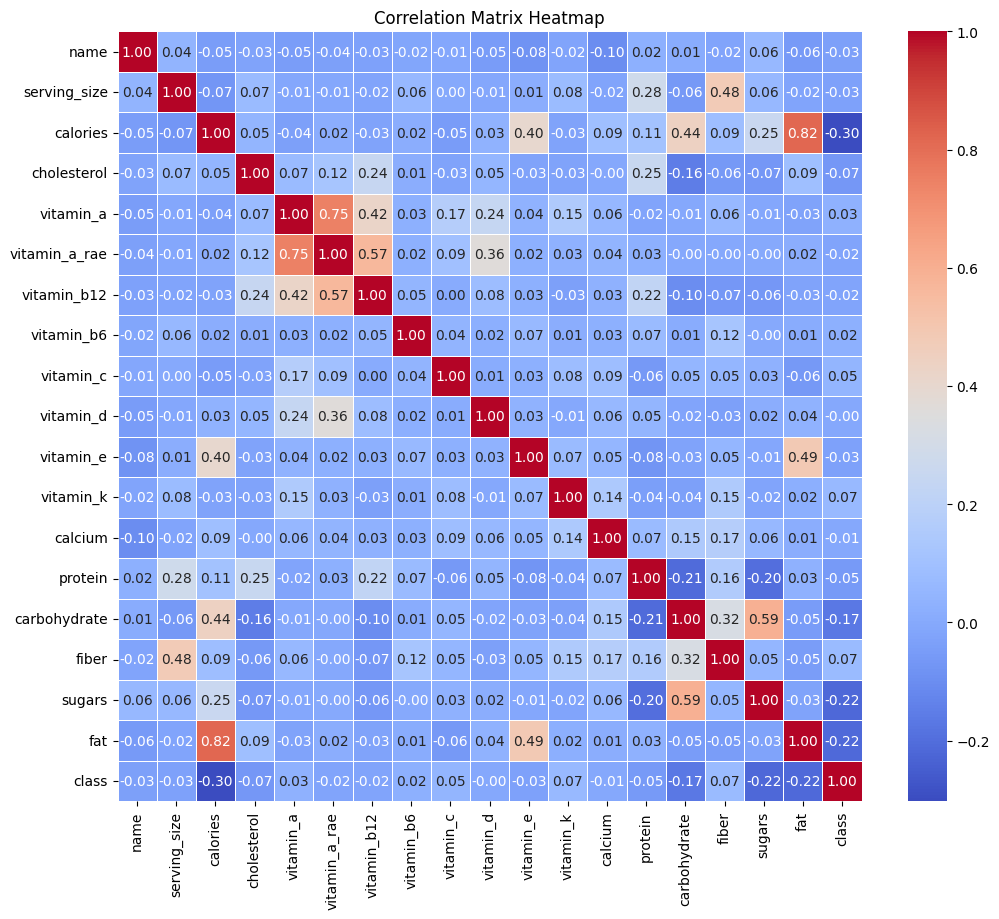

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

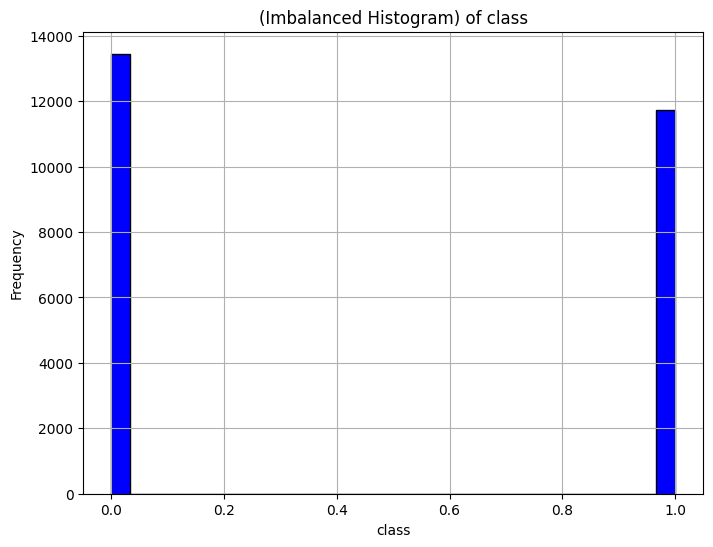

In [ ]:
column_name = 'class'

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(data[column_name], bins=30, color='blue', edgecolor='black')
plt.title(f'(Imbalanced Histogram) of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the missing values for each column
print("Missing values in each column:")
print(missing_values)

# Print the total number of missing values in the dataset
total_missing = missing_values.sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")

# Optionally, print rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)

Missing values in each column:
name             0
serving_size     0
calories         0
cholesterol      0
vitamin_a        0
vitamin_a_rae    0
vitamin_b12      0
vitamin_b6       0
vitamin_c        0
vitamin_d        0
vitamin_e        0
vitamin_k        0
calcium          0
protein          0
carbohydrate     0
fiber            0
sugars           0
fat              0
class            0
dtype: int64

Total number of missing values in the dataset: 0

Rows with missing values:
Empty DataFrame
Columns: [name, serving_size, calories, cholesterol, vitamin_a, vitamin_a_rae, vitamin_b12, vitamin_b6, vitamin_c, vitamin_d, vitamin_e, vitamin_k, calcium, protein, carbohydrate, fiber, sugars, fat, class]
Index: []


In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV dataset
file_path = '/content/drive/MyDrive/cloud/updated-final_datas_set - updated-final_datas_set.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Define the columns for the scatter plot
x_column = 'protein'
y_column = 'calories'
color_column = 'class'

# Plotly scatter plot
fig = px.scatter(df, x=x_column, y=y_column, color=color_column, title='Scatter Plot')
fig.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Separate features (X) and target variable (y)
new_data= pd.read_csv('/content/drive/MyDrive/cloud/updated-final_datas_set - updated-final_datas_set.csv')

X = new_data.drop('class', axis=1)
y = new_data['class']

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply random oversampling
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Create a new balanced dataset
balanced_data = pd.concat([X_oversampled, y_oversampled], axis=1)

# Print the value counts of the target variable before and after oversampling
print("Before oversampling:")
print(y.value_counts())
print("\nAfter oversampling:")
print(y_oversampled.value_counts())

Before oversampling:
class
0    13449
1    11743
Name: count, dtype: int64

After oversampling:
class
0    13449
1    13449
Name: count, dtype: int64


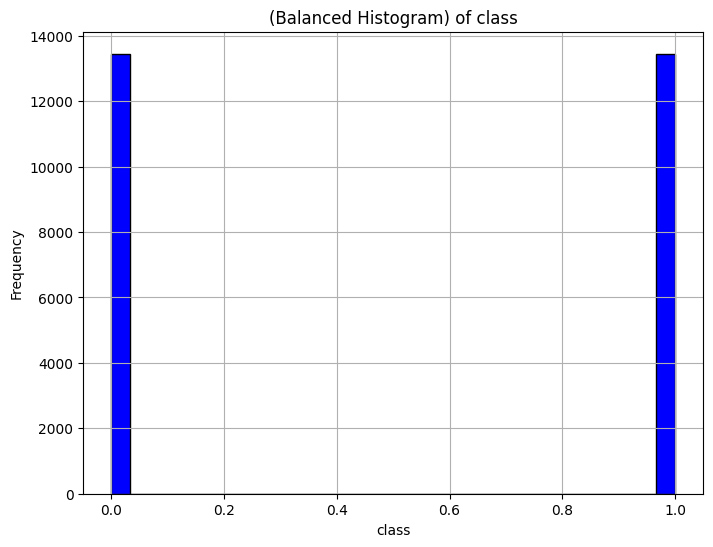

In [ ]:
column_name = 'class'

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(balanced_data[column_name], bins=30, color='blue', edgecolor='black')
plt.title(f'(Balanced Histogram) of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel

#Selecting Important Features out of total
extratrees = ek.ExtraTreesClassifier().fit(X_oversampled, y_oversampled)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X_oversampled)
nbfeatures = X_new.shape[1]
nbfeatures

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



11

# **Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split using the selected features (X_new) and the target variable (y_oversampled)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_oversampled, test_size=0.30, random_state=0)

# **RandomForest**

In [ ]:
rf_classifier=RandomForestClassifier(max_depth=60, random_state=123)
rf_classifier.fit(X_train, y_train)
print("Training Accuracy:",rf_classifier.score(X_train,y_train))
print("Testing Accuracy:",rf_classifier.score(X_test,y_test))

Training Accuracy: 0.993254727002337
Testing Accuracy: 0.9773234200743495


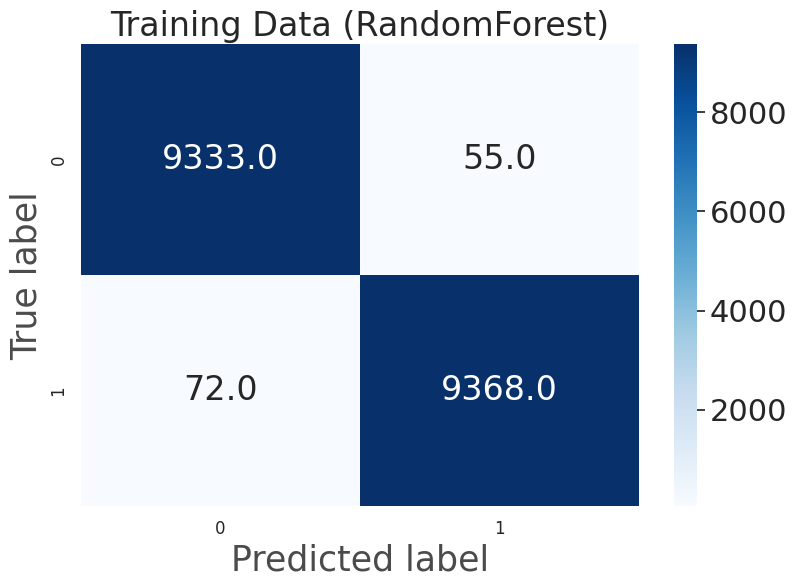

In [ ]:
#TrainingConfusionMatrix
y_pred_train=rf_classifier.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (RandomForest)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data Decision Tree.pdf")
plt.show()

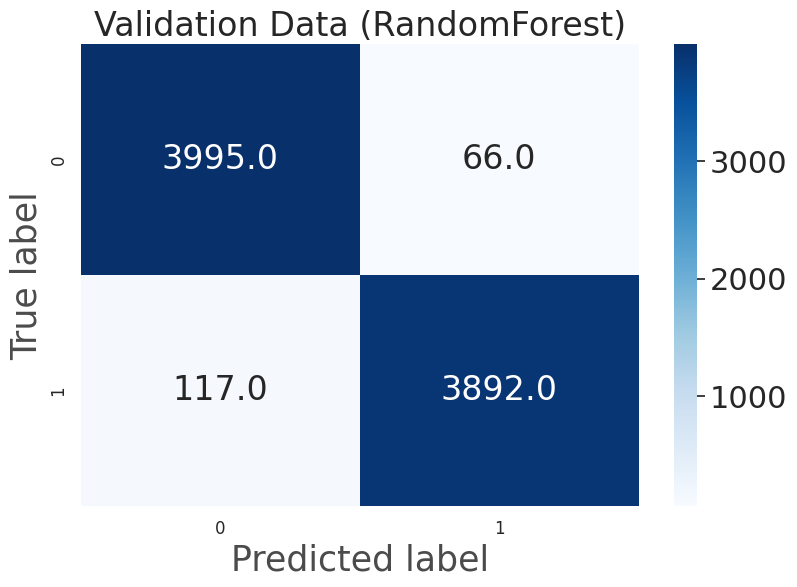

In [ ]:
#ValidationConfusionMatrix
y_pred_test=rf_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (RandomForest)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Testing Data Decision Tree.pdf")
plt.show()

## **DecisionTree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Training Accuracy:",dt.score(X_train,y_train))
print("Testing Accuracy:",dt.score(X_test,y_test))

Training Accuracy: 0.993254727002337
Testing Accuracy: 0.9742255266418836


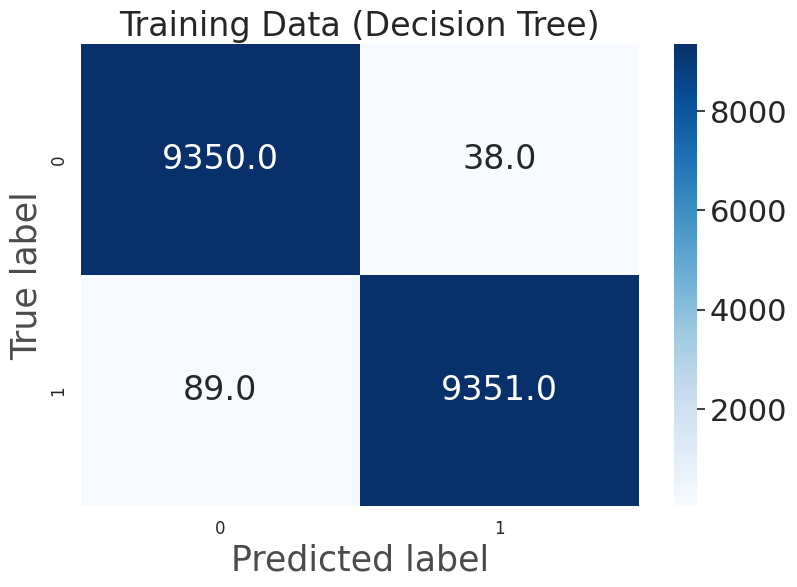

In [ ]:
#TrainingConfusionMatrix
y_pred_train=dt.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (Decision Tree)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data Decision Tree.pdf")
plt.show()

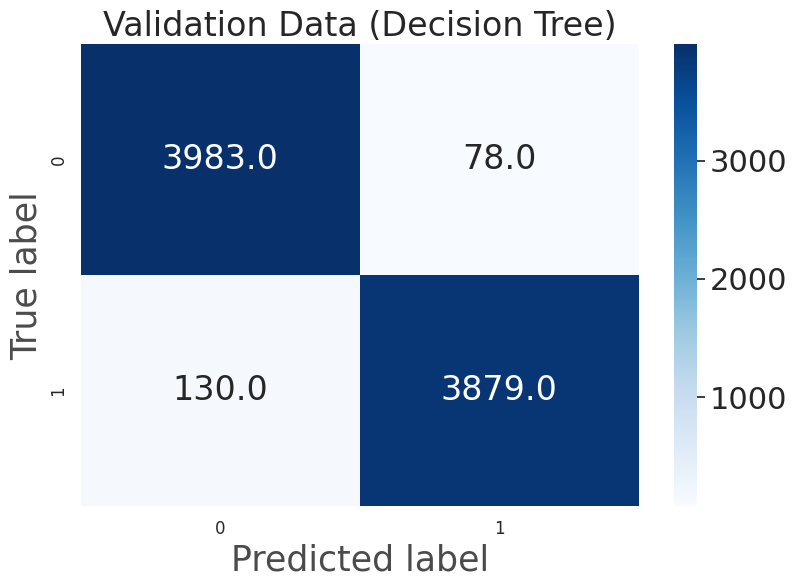

In [ ]:
#ValidationConfusionMatrix
y_pred_test=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (Decision Tree)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Testing Data Decision Tree.pdf")
plt.show()

## **KNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

print("Training Accuracy:",knn_classifier.score(X_train,y_train))
print("Testing Accuracy:",knn_classifier.score(X_test,y_test))

Training Accuracy: 0.9580943275971957
Testing Accuracy: 0.9519206939281288


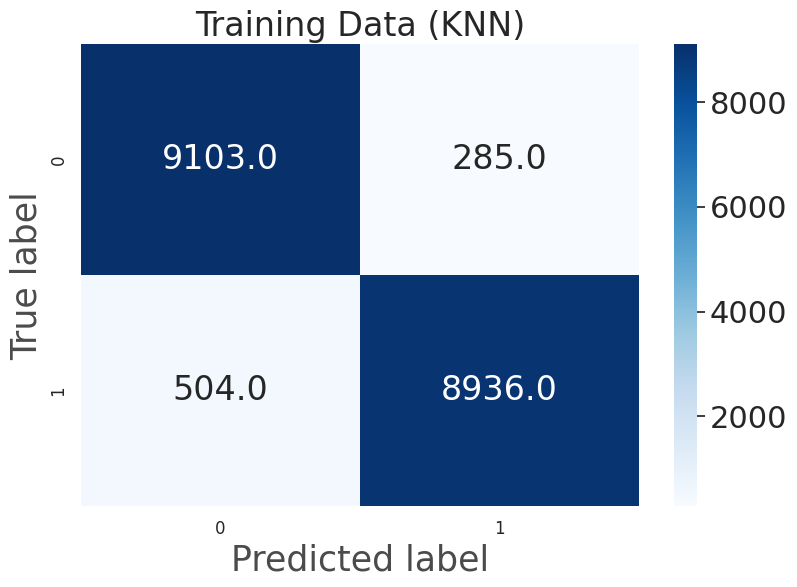

In [ ]:
#TrainingConfusionMatrix
y_pred_train=knn_classifier.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (KNN)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data KNN.pdf")
plt.show()

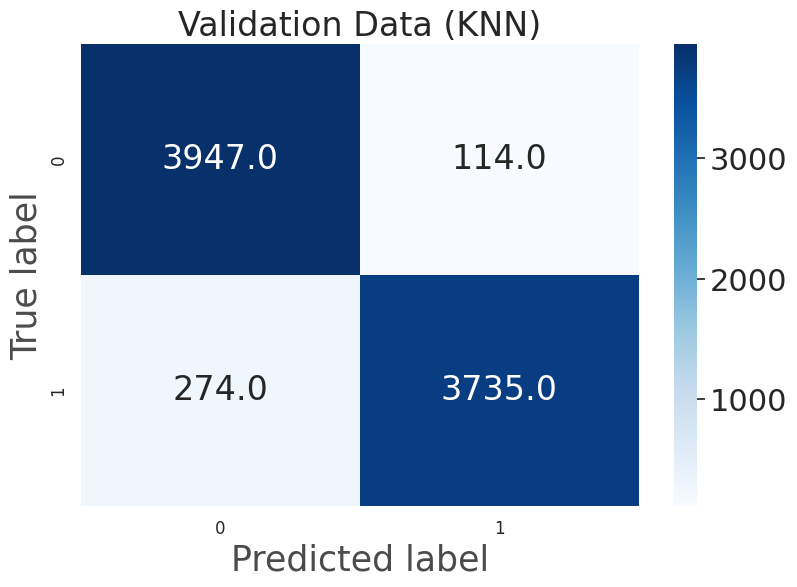

In [ ]:
#ValidationConfusionMatrix
y_pred_test=knn_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (KNN)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Validation Data KNN.pdf")
plt.show()

## **Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Training Accuracy:",logreg.score(X_train,y_train))
print("Testing Accuracy:",logreg.score(X_test,y_test))

Training Accuracy: 0.9279264924580413
Testing Accuracy: 0.9298636926889715


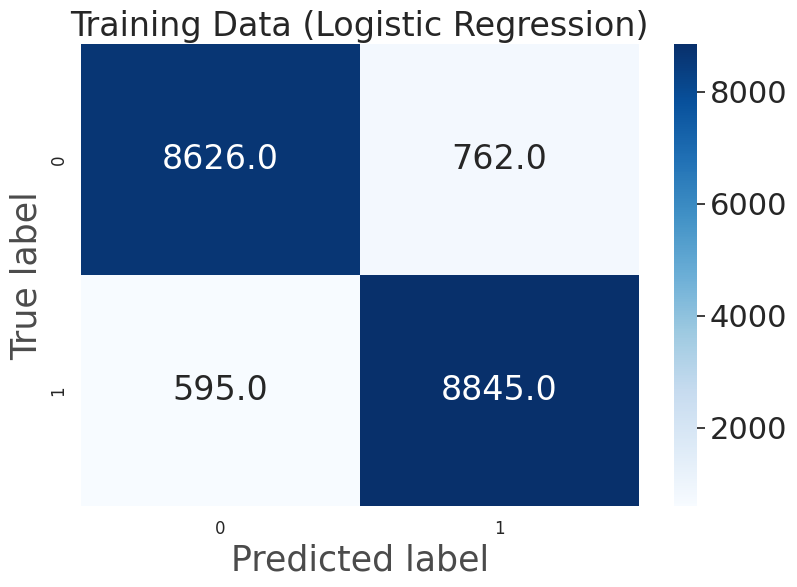

In [ ]:
#TrainingConfusionMatrix
y_pred_train=logreg.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (Logistic Regression)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data Logistic Regression.pdf")
plt.show()

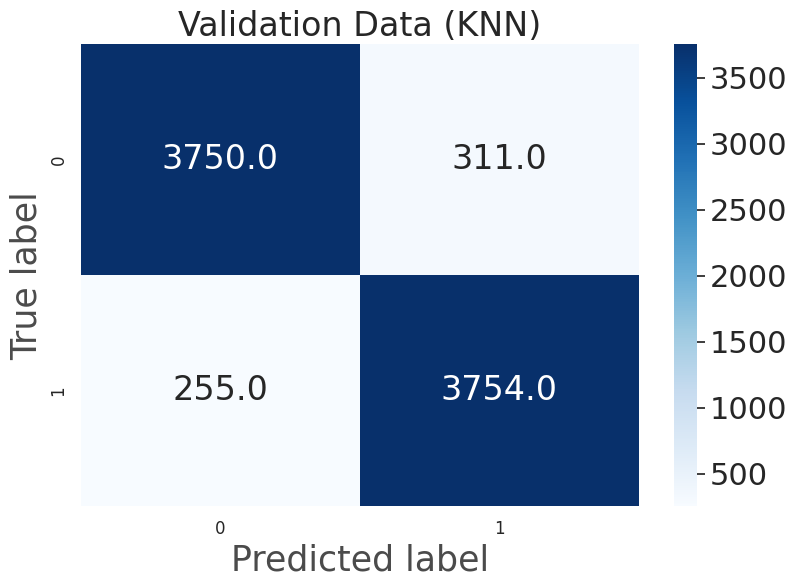

In [ ]:
#ValidationConfusionMatrix
y_pred_test=logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (KNN)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Validation Data Logistic Regression.pdf")
plt.show()

## **XGBOOST**

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
print("Training Accuracy:",xgb_model.score(X_train,y_train))
print("Testing Accuracy:",xgb_model.score(X_test,y_test))

Training Accuracy: 0.9883683875079669
Testing Accuracy: 0.9799256505576208


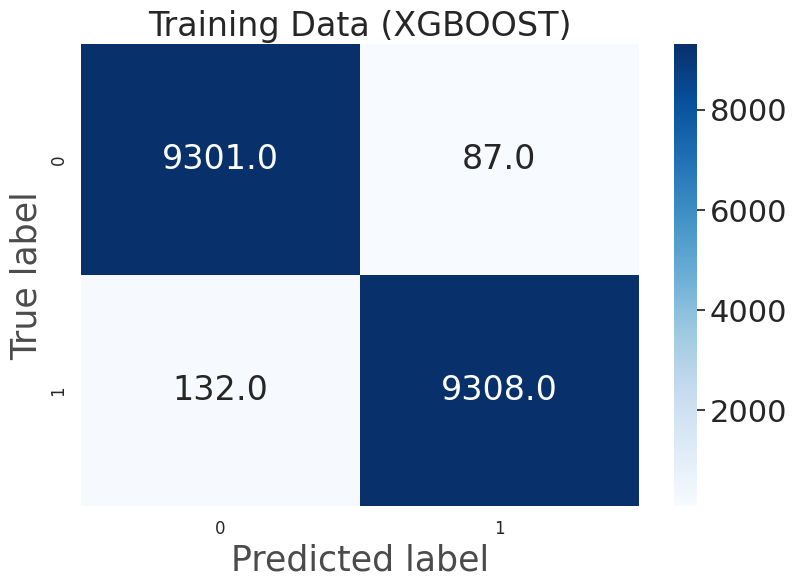

In [ ]:
#TrainingConfusionMatrix
y_pred_train=xgb_model.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (XGBOOST)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data XGBOOST.pdf")
plt.show()

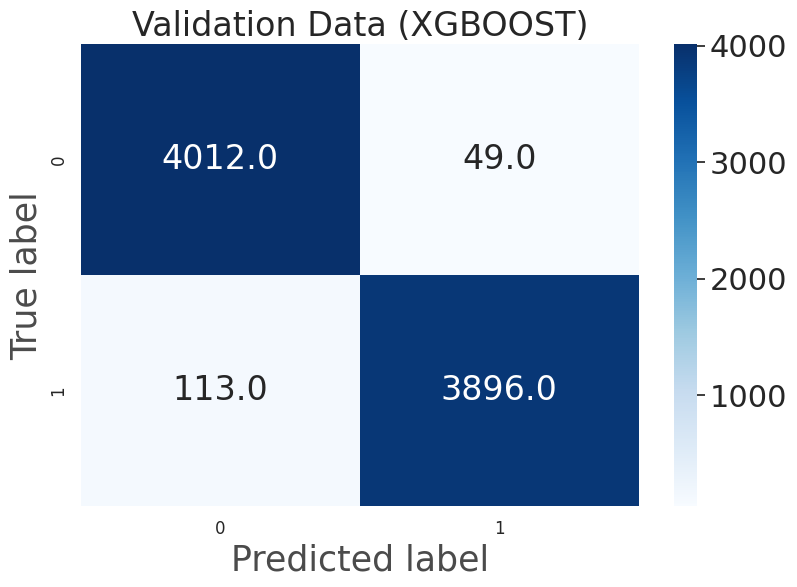

In [ ]:
#ValidationConfusionMatrix
y_pred_test=xgb_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (XGBOOST)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Validation Data XGBOOST.pdf")
plt.show()

## **SVM**

In [ ]:
svm = SVC(kernel="poly")
# Fit the SVM classifier on the training data
svm.fit(X_train, y_train)
print("Training Accuracy:",svm.score(X_train,y_train))
print("Testing Accuracy:",svm.score(X_test,y_test))

Training Accuracy: 0.8287125557680051
Testing Accuracy: 0.8235439900867411


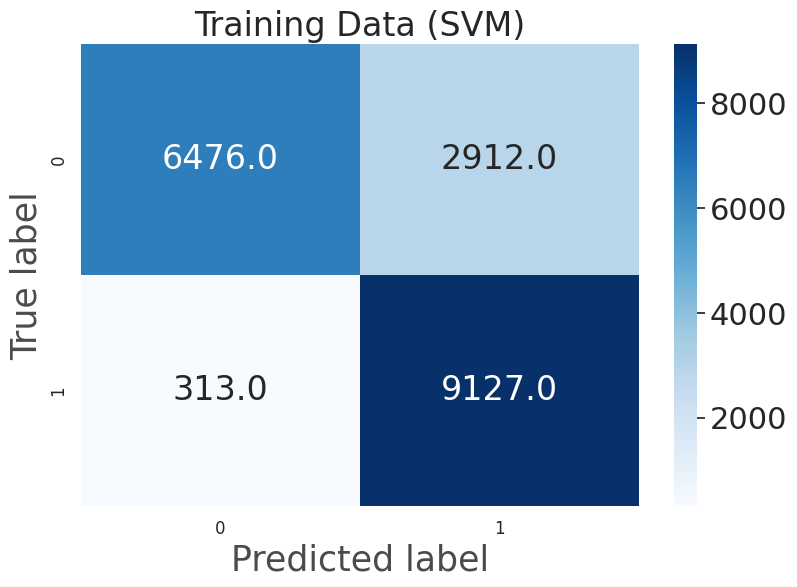

In [ ]:
#TrainingConfusionMatrix
y_pred_train=svm.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.set_style("darkgrid")
sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Training Data (SVM)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Training Data SVM.pdf")
plt.show()

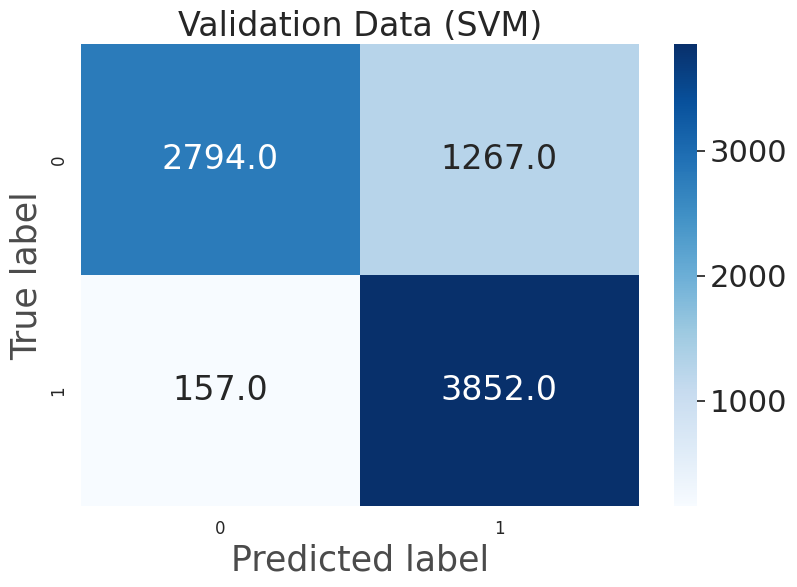

In [ ]:
#ValidationConfusionMatrix
y_pred_test=svm.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

#sns.set_style("darkgrid")
#sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(9, 6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', ax=ax)

plt.title("Validation Data (SVM)")
plt.ylabel('True label',fontsize=25,color="#4b4b4b")
plt.xlabel('Predicted label',fontsize=25,color="#4b4b4b")
plt.savefig("Validation Data SVM.pdf")
plt.show()